# NOTE: Please View The Following Notebook Files Before Viewing This One And Read The Markdowns. Thank You.

## 1. "data_preprocessing_1.ipynb"

## 2. "merged_df_2.ipynb"

# ---------------------------------------

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
%matplotlib inline

In [3]:
anti = "df.csv"
df = pd.read_csv(anti)

In [4]:
# Concatenate columns ADDRESS_1, ADDRESS_2, ADDRESS_3, ADDRESS_4, POSTCODE with commas
df['ADDRESS'] = df[['ADDRESS_1', 'ADDRESS_2', 'ADDRESS_3', 'ADDRESS_4', 'POSTCODE']].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Drop the original columns and other specified columns
df.drop(['ADDRESS_1', 'ADDRESS_2', 'ADDRESS_3', 'ADDRESS_4', 'POSTCODE', 'REGIONAL_OFFICE_CODE', 'ICB_CODE', 'PCO_CODE', 'PRACTICE_CODE', 'UNIDENTIFIED'], axis=1, inplace=True)



In [5]:
df

,YEAR_MONTH,REGIONAL_OFFICE_NAME,ICB_NAME,PCO_NAME,PRACTICE_NAME,BNF_CHEMICAL_SUBSTANCE,CHEMICAL_SUBSTANCE_BNF_DESCR,BNF_CODE,BNF_DESCRIPTION,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,ADDRESS
0,202401,NORTH WEST,NHS GREATER MANCHESTER INTEGRATED CARE B,NHS GREATER MANCHESTER ICB - 00Y,MOORSIDE MEDICAL PRACTICE,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,8.0,1,8.0,0.0,8.88,8.38322,"MOORSIDE MEDICAL CENTRE, 681 RIPPONDEN ROAD, M..."
1,202401,NORTH EAST AND YORKSHIRE,NHS NORTH EAST AND NORTH CUMBRIA INTEGRA,NHS NORTH EAST AND NORTH CUMBRIA ICB - 1,THORNTREE SURGERY,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,4.0,1,4.0,0.0,4.44,4.19781,"THORNTREE SURGERY, 11 BERESFORD BUILDINGS, MID..."
2,202401,MIDLANDS,NHS STAFFORDSHIRE AND STOKE-ON-TRENT INT,NHS STAFFORDSHIRE AND STOKE-ON-TRENT ICB,MILL BANK,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,8.0,1,8.0,0.0,8.88,8.38322,"MILL BANK SURGERY, WATER STREET, STAFFORD, UNK..."
3,202401,NORTH WEST,NHS CHESHIRE AND MERSEYSIDE INTEGRATED C,NHS CHESHIRE AND MERSEYSIDE ICB - 01X,ST HELENS ROTA OOH,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,4.0,1,4.0,0.0,4.44,4.19781,"ALBION STREET CLINIC, ALBION STREET, ST HELENS..."
4,202401,MIDLANDS,NHS LINCOLNSHIRE INTEGRATED CARE BOARD,NHS LINCOLNSHIRE ICB - 71E,MOULTON MEDICAL CENTRE,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,8.0,2,16.0,0.0,17.76,16.74163,"MOULTON MEDICAL CENTRE, HIGH STREET, MOULTON, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667212,202312,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOAR,NHS SOUTH YORKSHIRE ICB - 03L,BROOM LANE MEDICAL CENTRE,0501080W0,Trimethoprim,0501080W0AAAEAE,Trimethoprim 200mg tablets,05: Infections,14.0,11,154.0,77.0,12.76,12.13374,"BROOM LANE MEDICAL CENTRE, 70 BROOM LANE, BROO..."
3667213,202312,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOAR,NHS SOUTH YORKSHIRE ICB - 03L,BROOM LANE MEDICAL CENTRE,0501080W0,Trimethoprim,0501080W0AAAIAI,Trimethoprim 50mg/5ml oral suspension sugar free,05: Infections,200.0,1,200.0,5.0,13.22,12.44225,"BROOM LANE MEDICAL CENTRE, 70 BROOM LANE, BROO..."
3667214,202312,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOAR,NHS SOUTH YORKSHIRE ICB - 03L,BROOM LANE MEDICAL CENTRE,0501080W0,Trimethoprim,0501080W0AAAIAI,Trimethoprim 50mg/5ml oral suspension sugar free,05: Infections,120.0,1,120.0,3.0,7.93,7.56843,"BROOM LANE MEDICAL CENTRE, 70 BROOM LANE, BROO..."
3667215,202312,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOAR,NHS SOUTH YORKSHIRE ICB - 03L,BROOM LANE MEDICAL CENTRE,0501080W0,Trimethoprim,0501080W0AAAIAI,Trimethoprim 50mg/5ml oral suspension sugar free,05: Infections,140.0,1,140.0,3.5,9.25,8.80953,"BROOM LANE MEDICAL CENTRE, 70 BROOM LANE, BROO..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3667217 entries, 0 to 3667216
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   YEAR_MONTH                    int64  
 1   REGIONAL_OFFICE_NAME          object 
 2   ICB_NAME                      object 
 3   PCO_NAME                      object 
 4   PRACTICE_NAME                 object 
 5   BNF_CHEMICAL_SUBSTANCE        object 
 6   CHEMICAL_SUBSTANCE_BNF_DESCR  object 
 7   BNF_CODE                      object 
 8   BNF_DESCRIPTION               object 
 9   BNF_CHAPTER_PLUS_CODE         object 
 10  QUANTITY                      float64
 11  ITEMS                         int64  
 12  TOTAL_QUANTITY                float64
 13  ADQUSAGE                      float64
 14  NIC                           float64
 15  ACTUAL_COST                   float64
 16  ADDRESS                       object 
dtypes: float64(5), int64(2), object(10)
memory usage: 475.6+ MB


In [7]:
# Ensure 'YEAR_MONTH' is treated as a string
df['YEAR_MONTH'] = df['YEAR_MONTH'].astype(str)

# Extract the month part and convert to integer
df['MONTH'] = df['YEAR_MONTH'].str[-2:].astype(int)

# Extract the year part and convert to integer (optional)
df['YEAR'] = df['YEAR_MONTH'].str[:4].astype(int)


In [8]:
df

,YEAR_MONTH,REGIONAL_OFFICE_NAME,ICB_NAME,PCO_NAME,PRACTICE_NAME,BNF_CHEMICAL_SUBSTANCE,CHEMICAL_SUBSTANCE_BNF_DESCR,BNF_CODE,BNF_DESCRIPTION,BNF_CHAPTER_PLUS_CODE,QUANTITY,ITEMS,TOTAL_QUANTITY,ADQUSAGE,NIC,ACTUAL_COST,ADDRESS,MONTH,YEAR
0,202401,NORTH WEST,NHS GREATER MANCHESTER INTEGRATED CARE B,NHS GREATER MANCHESTER ICB - 00Y,MOORSIDE MEDICAL PRACTICE,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,8.0,1,8.0,0.0,8.88,8.38322,"MOORSIDE MEDICAL CENTRE, 681 RIPPONDEN ROAD, M...",1,2024
1,202401,NORTH EAST AND YORKSHIRE,NHS NORTH EAST AND NORTH CUMBRIA INTEGRA,NHS NORTH EAST AND NORTH CUMBRIA ICB - 1,THORNTREE SURGERY,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,4.0,1,4.0,0.0,4.44,4.19781,"THORNTREE SURGERY, 11 BERESFORD BUILDINGS, MID...",1,2024
2,202401,MIDLANDS,NHS STAFFORDSHIRE AND STOKE-ON-TRENT INT,NHS STAFFORDSHIRE AND STOKE-ON-TRENT ICB,MILL BANK,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,8.0,1,8.0,0.0,8.88,8.38322,"MILL BANK SURGERY, WATER STREET, STAFFORD, UNK...",1,2024
3,202401,NORTH WEST,NHS CHESHIRE AND MERSEYSIDE INTEGRATED C,NHS CHESHIRE AND MERSEYSIDE ICB - 01X,ST HELENS ROTA OOH,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,4.0,1,4.0,0.0,4.44,4.19781,"ALBION STREET CLINIC, ALBION STREET, ST HELENS...",1,2024
4,202401,MIDLANDS,NHS LINCOLNSHIRE INTEGRATED CARE BOARD,NHS LINCOLNSHIRE ICB - 71E,MOULTON MEDICAL CENTRE,1103010C0,Chloramphenicol,1103010C0BJAAAD,Golden Eye Antibiotic 1% eye ointment,11: Eye,8.0,2,16.0,0.0,17.76,16.74163,"MOULTON MEDICAL CENTRE, HIGH STREET, MOULTON, ...",1,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667212,202312,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOAR,NHS SOUTH YORKSHIRE ICB - 03L,BROOM LANE MEDICAL CENTRE,0501080W0,Trimethoprim,0501080W0AAAEAE,Trimethoprim 200mg tablets,05: Infections,14.0,11,154.0,77.0,12.76,12.13374,"BROOM LANE MEDICAL CENTRE, 70 BROOM LANE, BROO...",12,2023
3667213,202312,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOAR,NHS SOUTH YORKSHIRE ICB - 03L,BROOM LANE MEDICAL CENTRE,0501080W0,Trimethoprim,0501080W0AAAIAI,Trimethoprim 50mg/5ml oral suspension sugar free,05: Infections,200.0,1,200.0,5.0,13.22,12.44225,"BROOM LANE MEDICAL CENTRE, 70 BROOM LANE, BROO...",12,2023
3667214,202312,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOAR,NHS SOUTH YORKSHIRE ICB - 03L,BROOM LANE MEDICAL CENTRE,0501080W0,Trimethoprim,0501080W0AAAIAI,Trimethoprim 50mg/5ml oral suspension sugar free,05: Infections,120.0,1,120.0,3.0,7.93,7.56843,"BROOM LANE MEDICAL CENTRE, 70 BROOM LANE, BROO...",12,2023
3667215,202312,NORTH EAST AND YORKSHIRE,NHS SOUTH YORKSHIRE INTEGRATED CARE BOAR,NHS SOUTH YORKSHIRE ICB - 03L,BROOM LANE MEDICAL CENTRE,0501080W0,Trimethoprim,0501080W0AAAIAI,Trimethoprim 50mg/5ml oral suspension sugar free,05: Infections,140.0,1,140.0,3.5,9.25,8.80953,"BROOM LANE MEDICAL CENTRE, 70 BROOM LANE, BROO...",12,2023


### 1.  Monthly Percentage of Total Quantities of Medications Dispensed by Regional Office

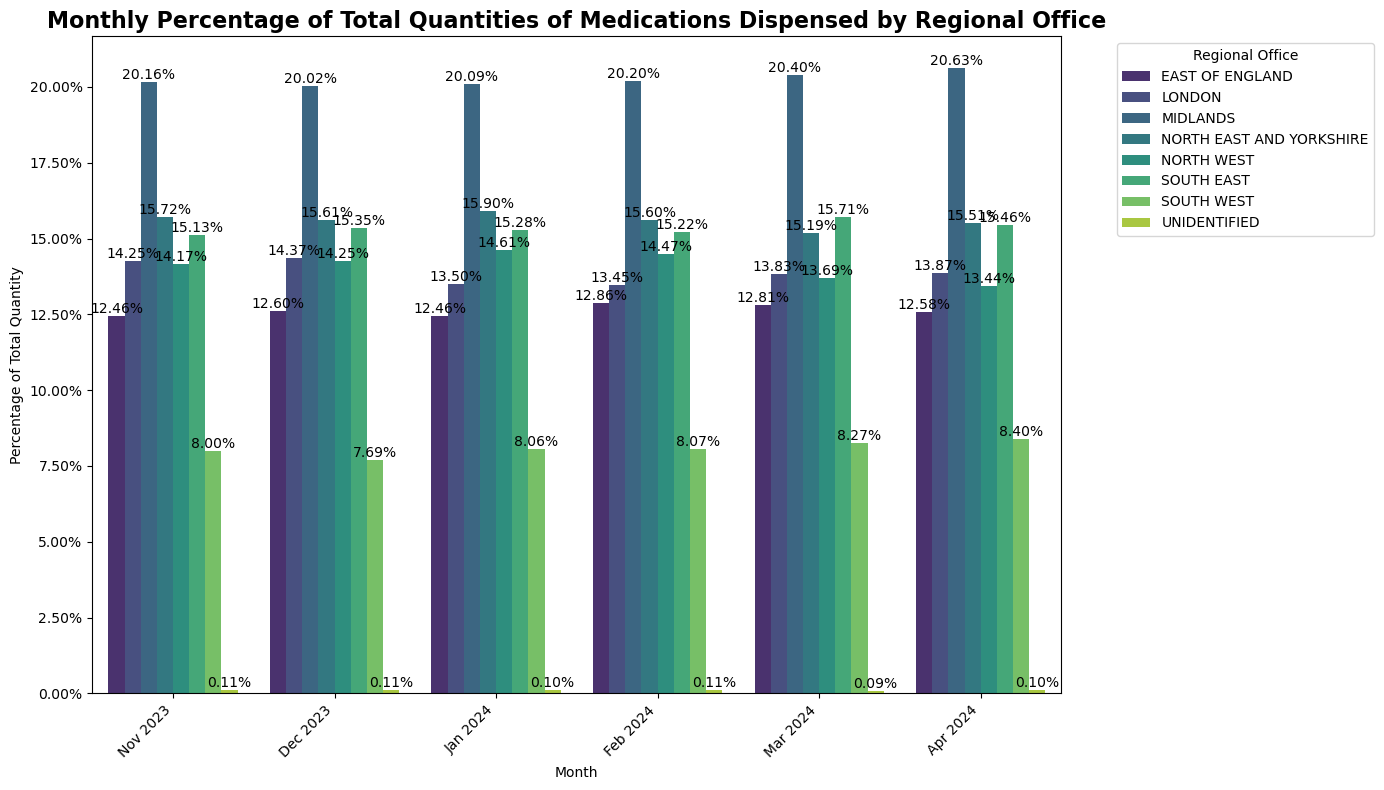

In [9]:
# Group by REGIONAL_OFFICE_NAME and MONTH, summing the TOTAL_QUANTITY
regional_monthly_quantity = df.groupby(['REGIONAL_OFFICE_NAME', 'MONTH'])['TOTAL_QUANTITY'].sum().reset_index()

# Calculate the total quantity per month across all regional offices
total_quantity_per_month = regional_monthly_quantity.groupby('MONTH')['TOTAL_QUANTITY'].sum().reset_index()
total_quantity_per_month.rename(columns={'TOTAL_QUANTITY': 'TOTAL_MONTHLY_QUANTITY'}, inplace=True)

# Merge total quantities per month with regional quantities
regional_monthly_quantity = pd.merge(regional_monthly_quantity, total_quantity_per_month, on='MONTH')

# Compute the percentage of each regional office's quantity relative to the total for each month
regional_monthly_quantity['QUANTITY_PERCENTAGE'] = (regional_monthly_quantity['TOTAL_QUANTITY'] / regional_monthly_quantity['TOTAL_MONTHLY_QUANTITY']) * 100

# Map month numbers to abbreviated month names with year
month_names = {
    11: 'Nov 2023', 12: 'Dec 2023', 1: 'Jan 2024', 2: 'Feb 2024', 3: 'Mar 2024', 4: 'Apr 2024'
}

# Replace month numbers with names for sorting and plotting
regional_monthly_quantity['MONTH'] = regional_monthly_quantity['MONTH'].map(month_names)

# Sort the data by month, ensuring correct chronological order
regional_monthly_quantity['MONTH'] = pd.Categorical(regional_monthly_quantity['MONTH'], 
                                                     categories=['Nov 2023', 'Dec 2023', 
                                                                 'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024'], 
                                                     ordered=True)

# Plot: Monthly Percentage of Total Quantities by Regional Office
plt.figure(figsize=(14, 8))
sns.barplot(x='MONTH', y='QUANTITY_PERCENTAGE', hue='REGIONAL_OFFICE_NAME', data=regional_monthly_quantity, palette='viridis')

plt.title('Monthly Percentage of Total Quantities of Medications Dispensed by Regional Office', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Percentage of Total Quantity')
plt.xticks(rotation=45, ha='right')

# Adjust y-axis tick labels to show percentage values
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}%'))

# Add percentage labels to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2.,
        height,
        f'{height:.2f}%',
        ha="center", 
        va="bottom",
        fontsize=10
    )


plt.legend(title='Regional Office', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('1.png')
plt.show()


### 2. Percentage of Total Quantities of Medications Dispensed by Regional Office

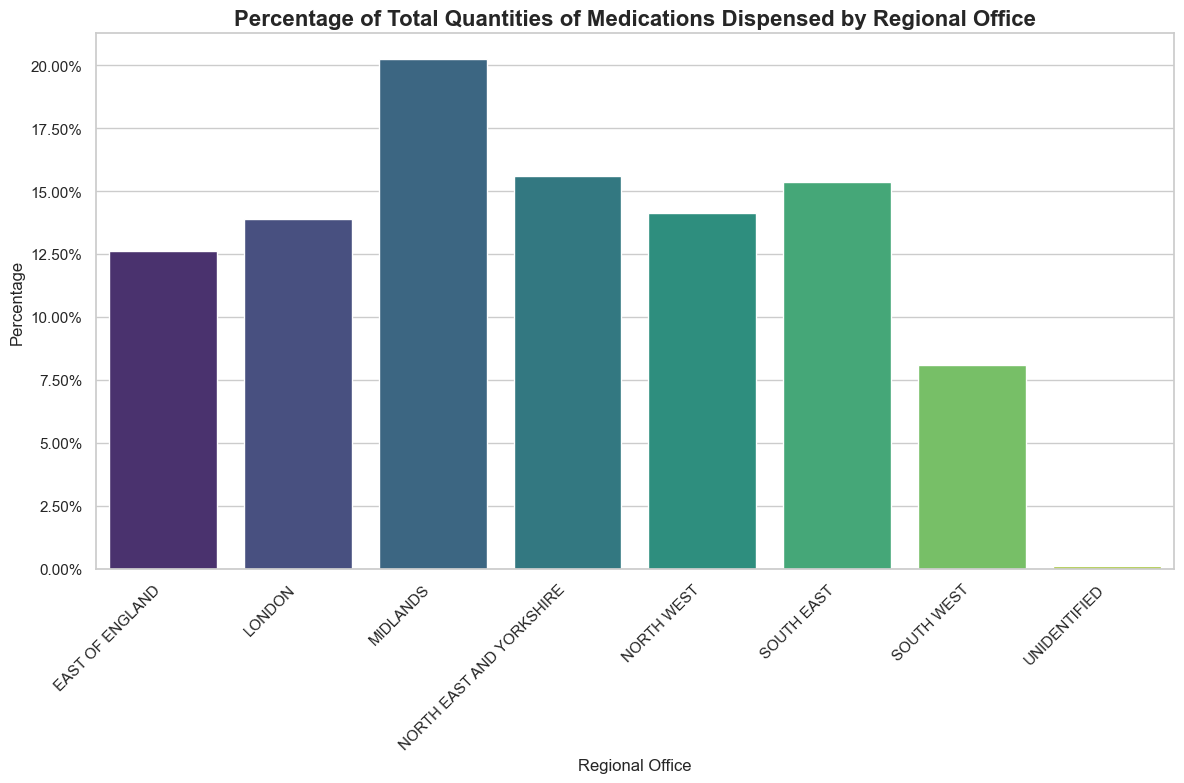

In [10]:
# Group by REGIONAL_OFFICE_NAME and sum the TOTAL_QUANTITY and ACTUAL_COST
regional_quantity_cost = df.groupby('REGIONAL_OFFICE_NAME').agg({
    'TOTAL_QUANTITY': 'sum',
    'ACTUAL_COST': 'sum'
}).reset_index()

# Calculate the total quantity and total cost across all regional offices
total_quantity_all = regional_quantity_cost['TOTAL_QUANTITY'].sum()
total_cost_all = regional_quantity_cost['ACTUAL_COST'].sum()

# Compute the percentage for each regional office
regional_quantity_cost['QUANTITY_PERCENTAGE'] = (regional_quantity_cost['TOTAL_QUANTITY'] / total_quantity_all) * 100
regional_quantity_cost['COST_PERCENTAGE'] = (regional_quantity_cost['ACTUAL_COST'] / total_cost_all) * 100

# Sort by REGIONAL_OFFICE_NAME
regional_quantity_cost.sort_values(['REGIONAL_OFFICE_NAME'], inplace=True)

# Set the style of the plot
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(x='REGIONAL_OFFICE_NAME', y='QUANTITY_PERCENTAGE', data=regional_quantity_cost, palette='viridis')
plt.title('Percentage of Total Quantities of Medications Dispensed by Regional Office', fontsize=16, weight='bold')
plt.xlabel('Regional Office')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right') 

# Adjust y-axis tick labels to show percentage values
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}%'))

plt.tight_layout()
plt.savefig('2.png')
plt.show()


### 3. Actual Cost of Medication wrt Regions

Regional Office: EAST OF ENGLAND, Actual Cost Percentage: 12.14%
Regional Office: LONDON, Actual Cost Percentage: 12.30%
Regional Office: MIDLANDS, Actual Cost Percentage: 19.67%
Regional Office: NORTH EAST AND YORKSHIRE, Actual Cost Percentage: 16.99%
Regional Office: NORTH WEST, Actual Cost Percentage: 14.35%
Regional Office: SOUTH EAST, Actual Cost Percentage: 15.01%
Regional Office: SOUTH WEST, Actual Cost Percentage: 9.46%
Regional Office: UNIDENTIFIED, Actual Cost Percentage: 0.08%


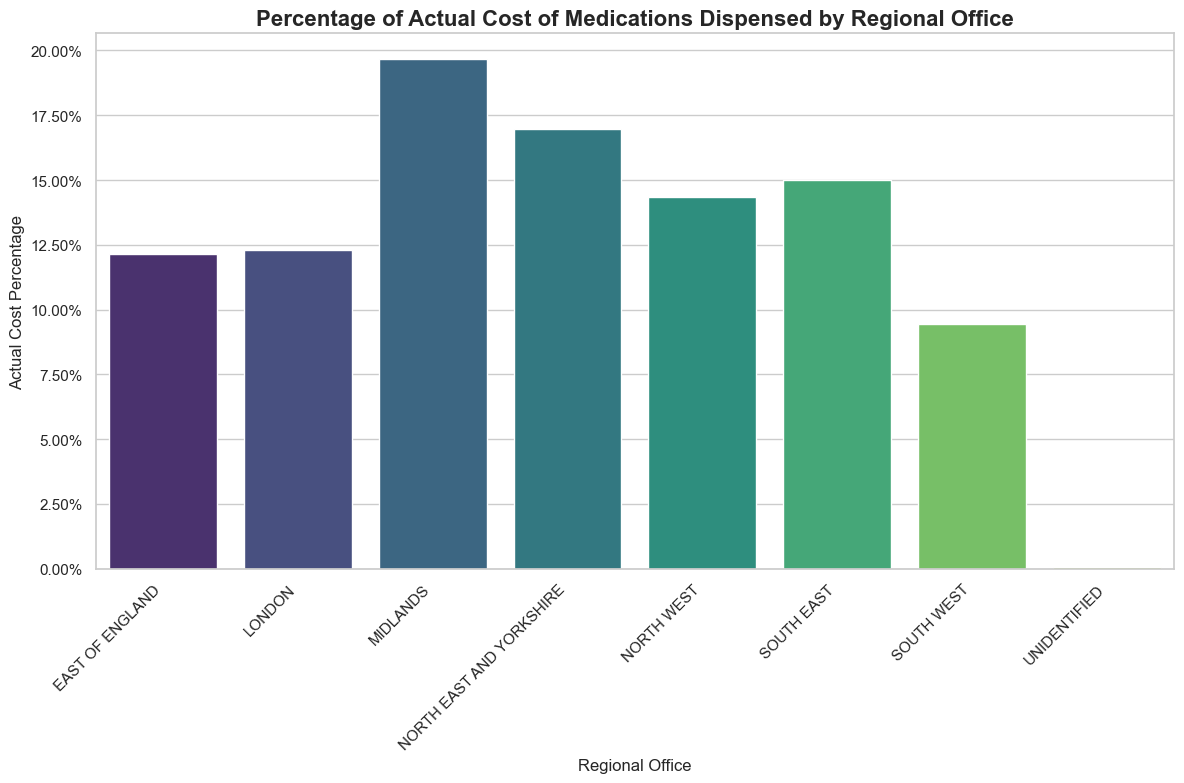

In [11]:
# Group by REGIONAL_OFFICE_NAME and sum the ACTUAL_COST
regional_actual_cost = df.groupby('REGIONAL_OFFICE_NAME')['ACTUAL_COST'].sum().reset_index()

# Calculate the total ACTUAL_COST across all regional offices
total_actual_cost_all = regional_actual_cost['ACTUAL_COST'].sum()

# Compute the percentage ACTUAL_COST for each regional office
regional_actual_cost['ACTUAL_COST_PERCENTAGE'] = (regional_actual_cost['ACTUAL_COST'] / total_actual_cost_all) * 100

# Iterate over the DataFrame to print the percentages
for index, row in regional_actual_cost.iterrows():
    regional_office = row['REGIONAL_OFFICE_NAME']
    actual_cost_percentage = row['ACTUAL_COST_PERCENTAGE']
    print(f"Regional Office: {regional_office}, Actual Cost Percentage: {actual_cost_percentage:.2f}%")

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='REGIONAL_OFFICE_NAME', y='ACTUAL_COST_PERCENTAGE', data=regional_actual_cost, palette='viridis')
plt.title('Percentage of Actual Cost of Medications Dispensed by Regional Office', fontsize=16, weight='bold')
plt.xlabel('Regional Office')
plt.ylabel('Actual Cost Percentage')
plt.xticks(rotation=45, ha='right')

# Adjust y-axis tick labels to show percentage values
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2f}%'))

plt.tight_layout()
plt.savefig('3.png')
plt.show()


### 4. Top 10 Antibiotics In Regions wrt Their Average Daily Quantity

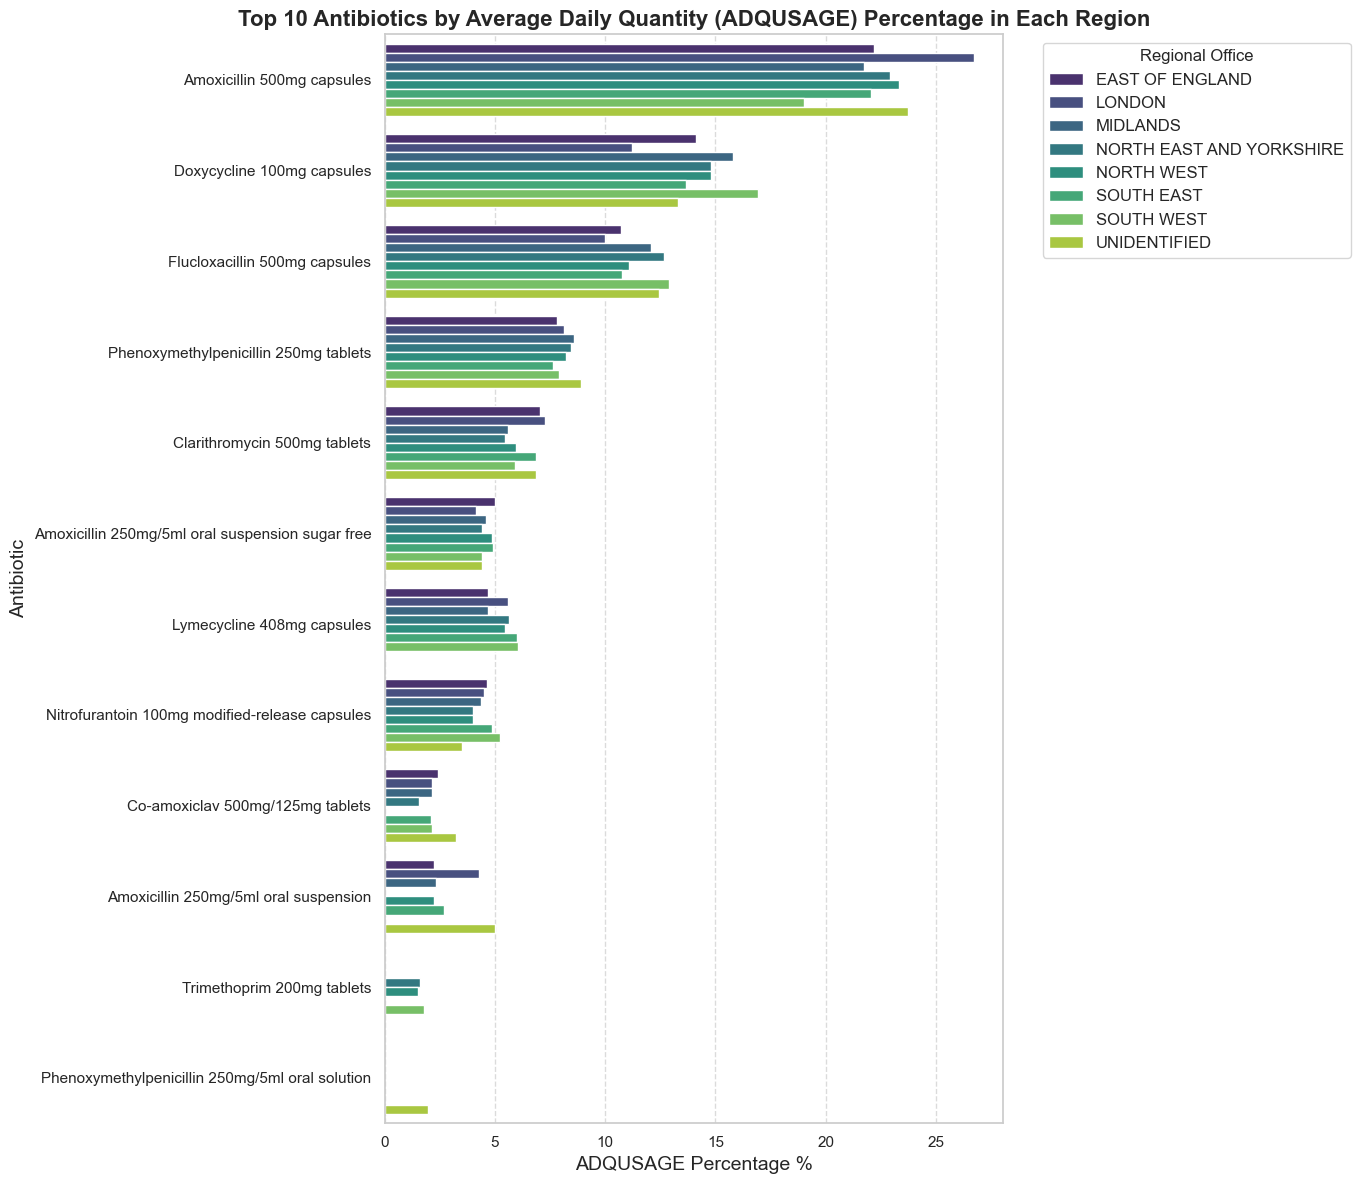

In [12]:
# 1. Group by REGIONAL_OFFICE_NAME and BNF_DESCRIPTION, summing the ADQUSAGE
regional_antibiotic_usage = df.groupby(['REGIONAL_OFFICE_NAME', 'BNF_DESCRIPTION'])['ADQUSAGE'].sum().reset_index()

# 2. Calculate the total ADQUSAGE per region
total_usage_per_region = regional_antibiotic_usage.groupby('REGIONAL_OFFICE_NAME')['ADQUSAGE'].sum().reset_index()
total_usage_per_region.rename(columns={'ADQUSAGE': 'TOTAL_ADQUSAGE'}, inplace=True)

# Merge total usage with antibiotic usage
regional_antibiotic_usage = pd.merge(regional_antibiotic_usage, total_usage_per_region, on='REGIONAL_OFFICE_NAME')

# 3. Calculate the percentage of each antibiotic's ADQUSAGE relative to the total ADQUSAGE for the region
regional_antibiotic_usage['USAGE_PERCENTAGE'] = (regional_antibiotic_usage['ADQUSAGE'] / regional_antibiotic_usage['TOTAL_ADQUSAGE']) * 100

# 4. Identify the top 10 antibiotics in each region based on USAGE_PERCENTAGE
top_10_antibiotics_usage_per_region = (
    regional_antibiotic_usage
    .sort_values(['REGIONAL_OFFICE_NAME', 'USAGE_PERCENTAGE'], ascending=[True, False])
    .groupby('REGIONAL_OFFICE_NAME')
    .head(10)
)

# 5. Plot: Top 10 Antibiotics by ADQUSAGE Percentage in Each Region
plt.figure(figsize=(14, 12))
sns.set(style="whitegrid")

# Create a barplot with percentage values
bar_plot = sns.barplot(
    data=top_10_antibiotics_usage_per_region,
    x='USAGE_PERCENTAGE',
    y='BNF_DESCRIPTION',
    hue='REGIONAL_OFFICE_NAME',
    palette='viridis'
)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title("Top 10 Antibiotics by Average Daily Quantity (ADQUSAGE) Percentage in Each Region", fontsize=16, weight='bold')
plt.xlabel('ADQUSAGE Percentage %', fontsize=14)
plt.ylabel('Antibiotic', fontsize=14)
plt.legend(title='Regional Office', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

plt.savefig('4.png')
plt.show()


### 5. Top 10 Antibiotics In Regions wrt Their Actual Cost

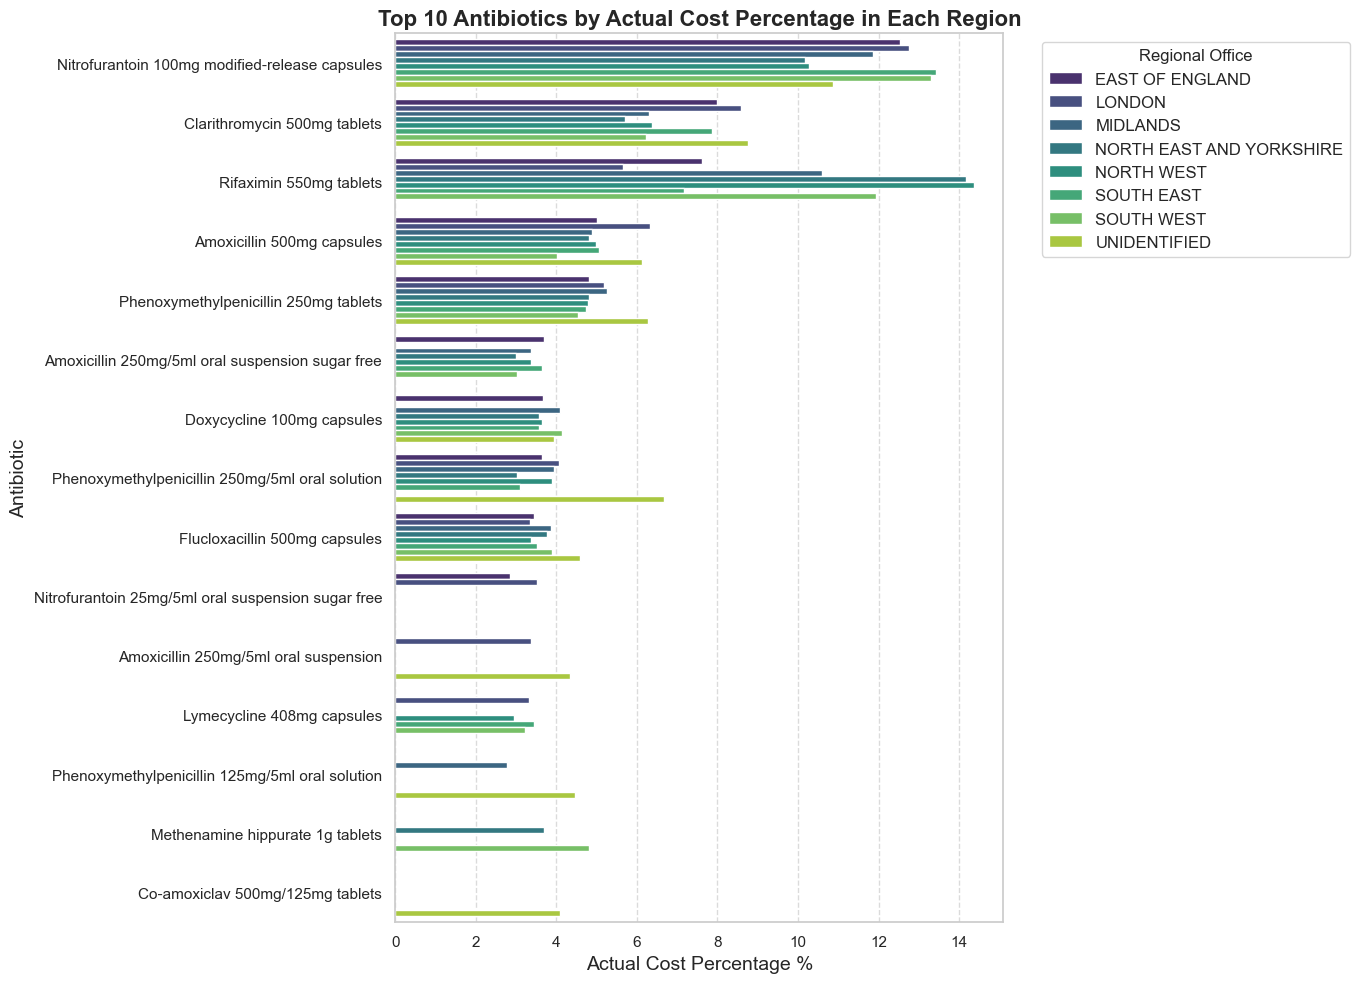

In [13]:
# 1. Group by REGIONAL_OFFICE_NAME and BNF_DESCRIPTION, summing the ACTUAL_COST
regional_antibiotic_cost = df.groupby(['REGIONAL_OFFICE_NAME', 'BNF_DESCRIPTION'])['ACTUAL_COST'].sum().reset_index()

# 2. Calculate the total cost per region
total_cost_per_region = regional_antibiotic_cost.groupby('REGIONAL_OFFICE_NAME')['ACTUAL_COST'].sum().reset_index()
total_cost_per_region.rename(columns={'ACTUAL_COST': 'TOTAL_COST'}, inplace=True)

# Merge total costs with antibiotic costs
regional_antibiotic_cost = pd.merge(regional_antibiotic_cost, total_cost_per_region, on='REGIONAL_OFFICE_NAME')

# 3. Calculate the percentage of each antibiotic's cost relative to the total cost for the region
regional_antibiotic_cost['COST_PERCENTAGE'] = (regional_antibiotic_cost['ACTUAL_COST'] / regional_antibiotic_cost['TOTAL_COST']) * 100

# 4. Identify the top 10 antibiotics in each region based on COST_PERCENTAGE
top_10_antibiotics_per_region = (
    regional_antibiotic_cost
    .sort_values(['REGIONAL_OFFICE_NAME', 'COST_PERCENTAGE'], ascending=[True, False])
    .groupby('REGIONAL_OFFICE_NAME')
    .head(10)
)

# 5. Plot: Top 10 Antibiotics by Cost Percentage in Each Region
plt.figure(figsize=(14, 10))
sns.set(style="whitegrid")

# Create a barplot with percentage values
bar_plot = sns.barplot(
    data=top_10_antibiotics_per_region,
    x='COST_PERCENTAGE',
    y='BNF_DESCRIPTION',
    hue='REGIONAL_OFFICE_NAME',
    palette='viridis'
)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title('Top 10 Antibiotics by Actual Cost Percentage in Each Region', fontsize=16, weight='bold')
plt.xlabel('Actual Cost Percentage %', fontsize=14)
plt.ylabel('Antibiotic', fontsize=14)
plt.legend(title='Regional Office', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

plt.savefig('5.png')

plt.show()


### 6. Top 10 Most Expensive Practices by Region

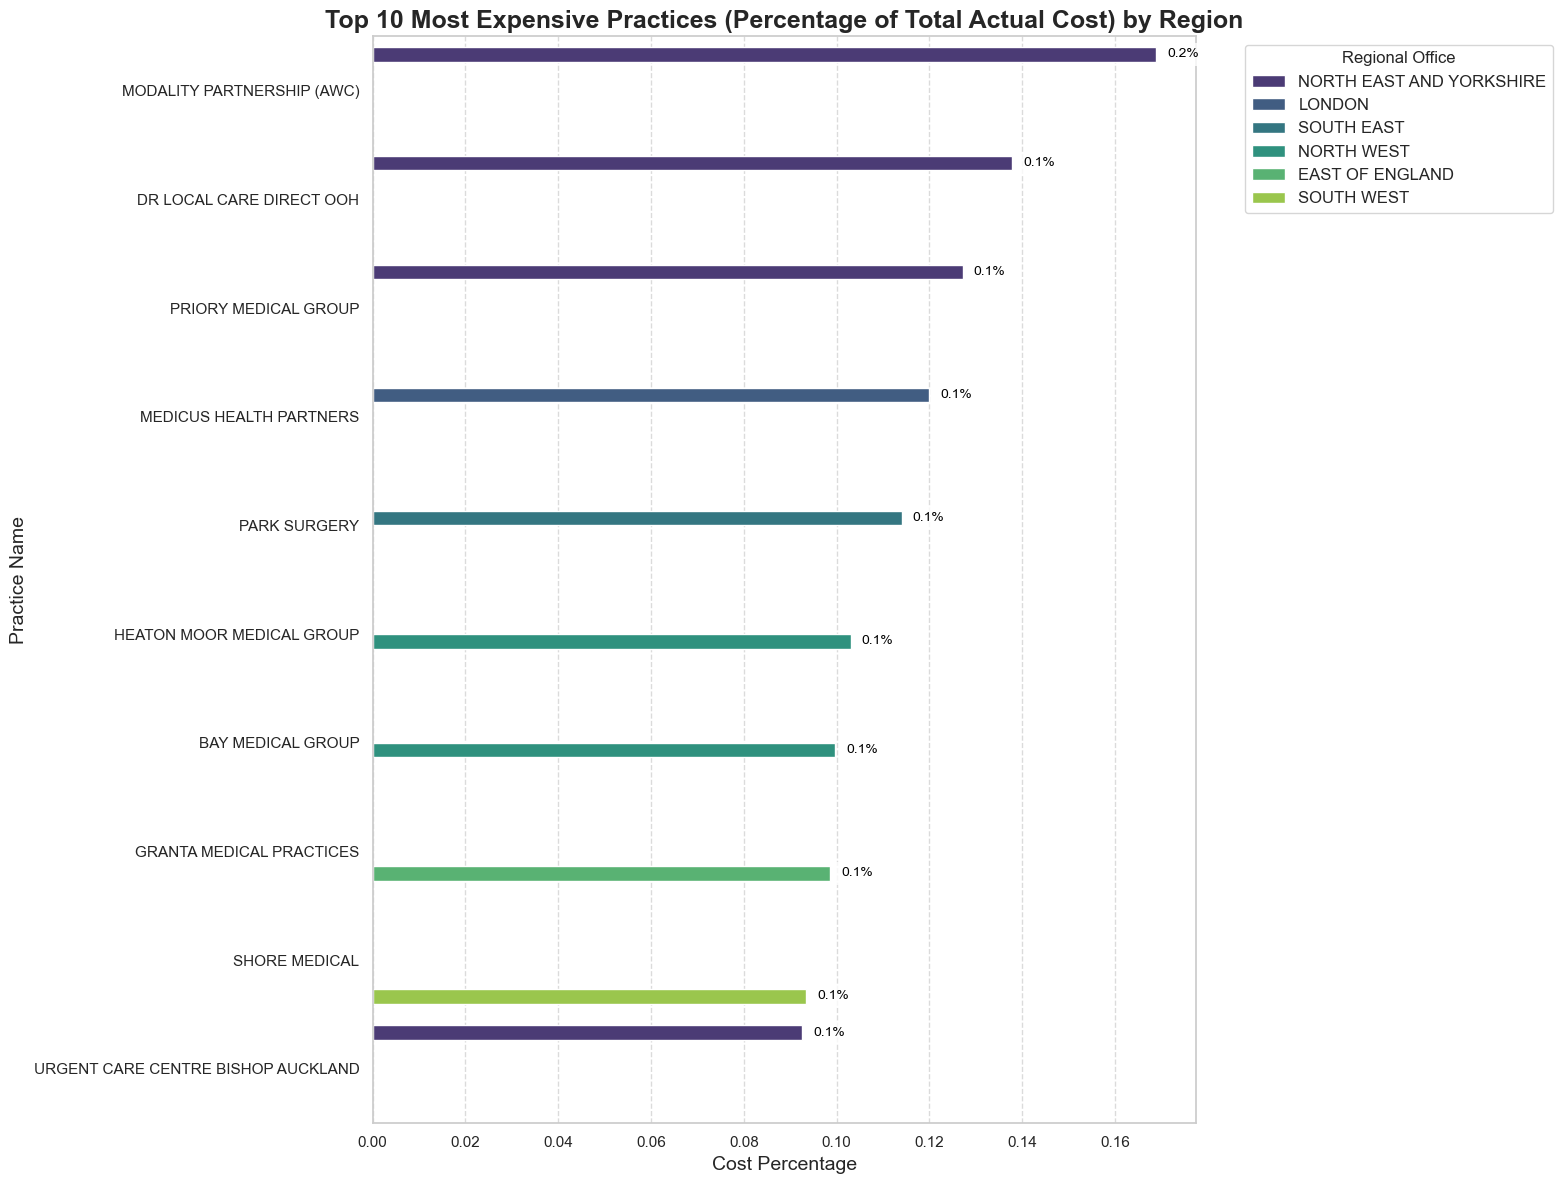

In [14]:
# 1. Group by PRACTICE_NAME and REGIONAL_OFFICE_NAME, summing the ACTUAL_COST
practice_cost_region = df.groupby(['PRACTICE_NAME', 'REGIONAL_OFFICE_NAME'])['ACTUAL_COST'].sum().reset_index()

# 2. Calculate the total ACTUAL_COST across all practices
total_cost_all_practices = practice_cost_region['ACTUAL_COST'].sum()

# 3. Calculate the percentage of each practice's cost relative to the total cost
practice_cost_region['COST_PERCENTAGE'] = (practice_cost_region['ACTUAL_COST'] / total_cost_all_practices) * 100

# 4. Identify the top 10 most expensive practices based on COST_PERCENTAGE
top_10_expensive_practices_region = (
    practice_cost_region
    .sort_values('COST_PERCENTAGE', ascending=False)
    .head(10)
)

# 5. Plot: Top 10 Most Expensive Practices by Cost Percentage with Regional Information
plt.figure(figsize=(16, 12))
sns.set(style="whitegrid")

# Create a barplot with percentage values
bar_plot = sns.barplot(
    data=top_10_expensive_practices_region,
    x='COST_PERCENTAGE',
    y='PRACTICE_NAME',
    hue='REGIONAL_OFFICE_NAME',  # Color by region
    palette='viridis',
    dodge=True  # Separate bars by hue
)

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add data labels on bars
for p in bar_plot.patches:
    width = p.get_width()
    bar_plot.annotate(
        f'{width:.1f}%',
        (width, p.get_y() + p.get_height() / 2),
        xytext=(8, 0),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=10,
        color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.8)
    )

plt.title('Top 10 Most Expensive Practices (Percentage of Total Actual Cost) by Region', fontsize=18, weight='bold')
plt.xlabel('Cost Percentage', fontsize=14)
plt.ylabel('Practice Name', fontsize=14)
plt.legend(title='Regional Office', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()

plt.savefig('6.png')

plt.show()


### 7. Correlation Matrix

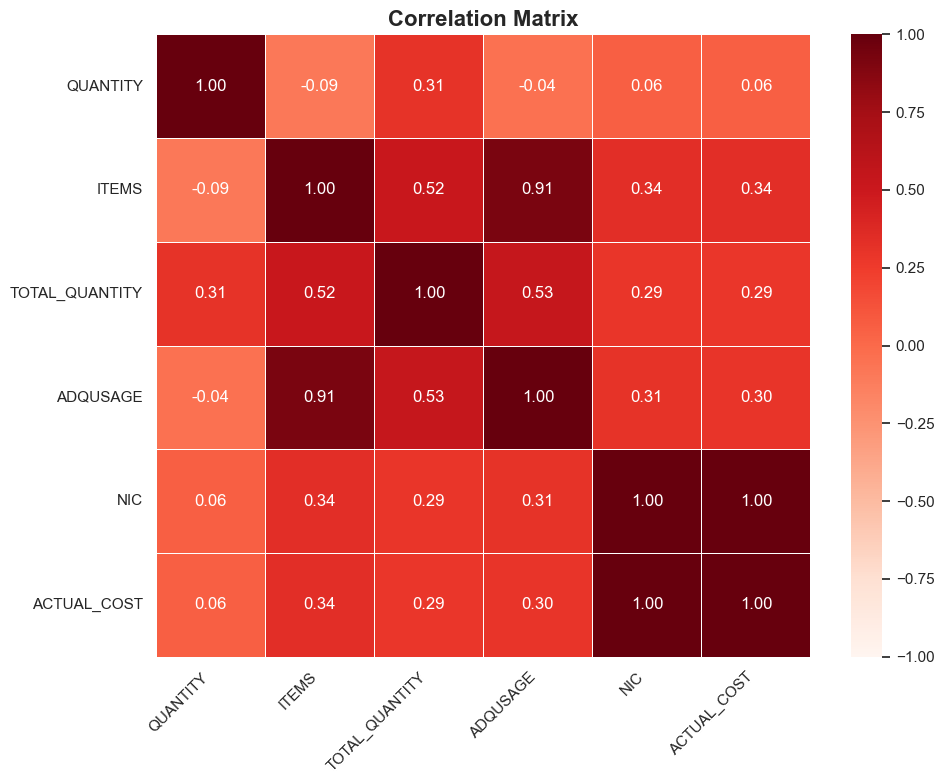

In [15]:
columns_of_interest = ['QUANTITY', 'ITEMS', 'TOTAL_QUANTITY', 'ADQUSAGE', 'NIC', 'ACTUAL_COST']
df_subset = df[columns_of_interest]

correlation_matrix = df_subset.corr()

plt.figure(figsize=(10, 8))
sns.set(style="white") 

heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,  
    cmap='Reds',
    fmt=".2f", 
    linewidths=0.5,  
    vmin=-1, vmax=1,  
    center=0 
)

plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.tight_layout()

plt.savefig('7.png')

plt.show()


### 8. Scatter Plot

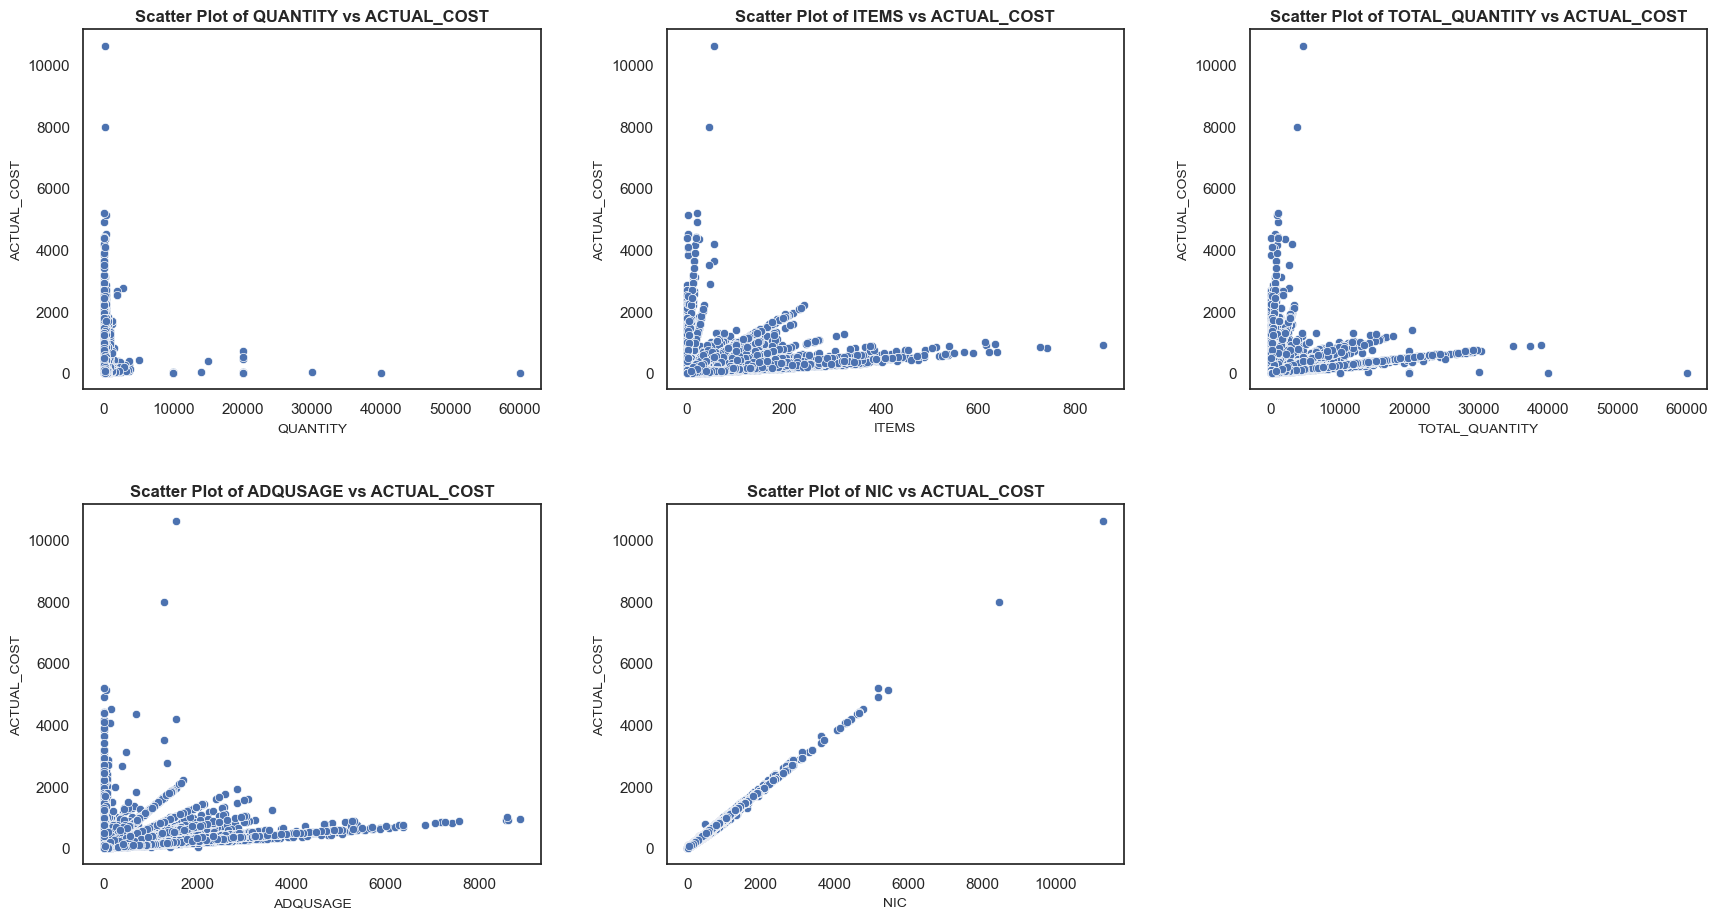

In [67]:
# Features and target
features = ['QUANTITY', 'ITEMS', 'TOTAL_QUANTITY', 'ADQUSAGE', 'NIC']
target = 'ACTUAL_COST'

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs {target}', fontsize=12, weight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel(target, fontsize=10)
    
axes[-1].axis('off') 

plt.tight_layout(pad=3.0)
plt.savefig('8.png')
plt.show()


In [55]:
# Handle missing values by removing rows with any missing values in the selected columns
df = df.dropna(subset=features + [target])

features = ['QUANTITY', 'ITEMS', 'TOTAL_QUANTITY', 'ADQUSAGE']
target = 'ACTUAL_COST'

# Define X and y
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train Shape:", X_train.shape)
print("Y Train Shape:", y_train.shape)
print("X Test Shape:", X_test.shape)
print("Y Test Shape:", y_test.shape)

# Initialize lists to store results
models = []
train_mses = []
test_mses = []
scores = []
maes = []

# Define a function to train, predict, and store results
def evaluate_model(model, model_name):
    try:
        # Cross-validation scores
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        avg_cv_score = -np.mean(cv_scores)  # Negate to get positive MSE
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Training predictions and MSE
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        
        # Validation predictions and MSE
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        # R2 score
        score = r2_score(y_test, y_test_pred)
        
        # Mean Absolute Error MAE
        mae = mean_absolute_error(y_test, y_test_pred)
        
        # Print and store results
        print(f"{model_name}:")
        print(f"  Cross-Validation MSE: {avg_cv_score:.2f}")
        print(f"  Training MSE: {train_mse:.2f}")
        print(f"  Validation MSE: {test_mse:.2f}")
        print(f"  R-squared: {score:.2f}")
        print(f"  MAE: {mae:.2f}")
        print('-' * 50)
        
        models.append(model_name)
        train_mses.append(train_mse)
        test_mses.append(test_mse)
        scores.append(score)
        maes.append(mae)
    
    except Exception as e:
        print(f"Error with {model_name}: {e}")

# Evaluate each model
evaluate_model(LinearRegression(), "Multi Linear Regression")
evaluate_model(BayesianRidge(), "Bayesian Ridge Regression")
# evaluate_model(SVR(), "Support Vector Regression")
# evaluate_model(KNeighborsRegressor(), "K-Nearest Neighbors Regression")
evaluate_model(Ridge(), "Ridge Regression")
evaluate_model(Lasso(), "Lasso Regression")
evaluate_model(ElasticNet(), "Elastic Net Regression")
evaluate_model(DecisionTreeRegressor(random_state=42), "Decision Tree Regression")
evaluate_model(RandomForestRegressor(n_estimators=50, random_state=42), "Random Forest Regression")
evaluate_model(AdaBoostRegressor(random_state=0, n_estimators=5), "Ada Boost Regression")
evaluate_model(GradientBoostingRegressor(random_state=42), "Gradient Boosting Regression")
evaluate_model(XGBRegressor(random_state=42), "XGBoost Regression")



X Train Shape: (2933773, 4)
Y Train Shape: (2933773,)
X Test Shape: (733444, 4)
Y Test Shape: (733444,)
Multi Linear Regression:
  Cross-Validation MSE: 4246.17
  Training MSE: 4250.27
  Validation MSE: 4218.41
  R-squared: 0.14
  MAE: 21.67
--------------------------------------------------
Bayesian Ridge Regression:
  Cross-Validation MSE: 4246.17
  Training MSE: 4250.27
  Validation MSE: 4218.42
  R-squared: 0.14
  MAE: 21.67
--------------------------------------------------
Ridge Regression:
  Cross-Validation MSE: 4246.17
  Training MSE: 4250.27
  Validation MSE: 4218.41
  R-squared: 0.14
  MAE: 21.67
--------------------------------------------------
Lasso Regression:
  Cross-Validation MSE: 4246.18
  Training MSE: 4250.32
  Validation MSE: 4218.74
  R-squared: 0.14
  MAE: 21.66
--------------------------------------------------
Elastic Net Regression:
  Cross-Validation MSE: 4246.22
  Training MSE: 4250.38
  Validation MSE: 4218.91
  R-squared: 0.14
  MAE: 21.66
---------------

### HyperParameter Tuning of RF Model

In [56]:
# Handle missing values by removing rows with any missing values in the selected columns
df = df.dropna(subset=features + [target])

# Define X and y
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train Shape:", X_train.shape)
print("Y Train Shape:", y_train.shape)
print("X Test Shape:", X_test.shape)
print("Y Test Shape:", y_test.shape)

# Define Random Forest model and pipeline
forest_pipeline = Pipeline([
    ('forest', RandomForestRegressor(random_state=42))
])

# Define a reduced parameter grid for faster tuning
forest_params = {
    'forest__n_estimators': [50, 100],
    'forest__max_depth': [None, 10],
    'forest__min_samples_split': [2, 5],
    'forest__min_samples_leaf': [1, 2],
    'forest__max_features': ['sqrt']
}

# Perform Randomized Search with fewer iterations
forest_random = RandomizedSearchCV(
    forest_pipeline, 
    forest_params, 
    n_iter=5,  # Reduced number of iterations
    cv=3,  # Fewer folds to save time
    scoring='neg_mean_squared_error', 
    n_jobs=1,  # Use 1 job to avoid overloading the system
    random_state=42
)
forest_random.fit(X_train, y_train)

# Print best parameters and evaluate
print("Best Random Forest Params:", forest_random.best_params_)

# Define a function to train, predict, and store results
def evaluate_model(model, model_name):
    try:
        # Cross-validation scores
        cv_scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
        avg_cv_score = -np.mean(cv_scores)  # Negate to get positive MSE
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Training predictions and MSE
        y_train_pred = model.predict(X_train)
        train_mse = mean_squared_error(y_train, y_train_pred)
        
        # Validation predictions and MSE
        y_test_pred = model.predict(X_test)
        test_mse = mean_squared_error(y_test, y_test_pred)
        
        # R2 score
        score = r2_score(y_test, y_test_pred)
        
        # Mean Absolute Error MAE
        mae = mean_absolute_error(y_test, y_test_pred)
        
        # Print and store results
        print(f"{model_name}:")
        print(f"  Cross-Validation MSE: {avg_cv_score:.2f}")
        print(f"  Training MSE: {train_mse:.2f}")
        print(f"  Validation MSE: {test_mse:.2f}")
        print(f"  R-squared: {score:.2f}")
        print(f"  MAE: {mae:.2f}")
        print('-' * 50)
        
        models.append(model_name)
        train_mses.append(train_mse)
        test_mses.append(test_mse)
        scores.append(score)
        maes.append(mae)
    
    except Exception as e:
        print(f"Error with {model_name}: {e}")

# Evaluate the optimized Random Forest model
evaluate_model(forest_random.best_estimator_, "Random Forest with Optimized Hyperparameter Tuning")


X Train Shape: (2933773, 4)
Y Train Shape: (2933773,)
X Test Shape: (733444, 4)
Y Test Shape: (733444,)
Best Random Forest Params: {'forest__n_estimators': 100, 'forest__min_samples_split': 2, 'forest__min_samples_leaf': 2, 'forest__max_features': 'sqrt', 'forest__max_depth': None}
Random Forest with Optimized Hyperparameter Tuning:
  Cross-Validation MSE: 2516.22
  Training MSE: 2426.38
  Validation MSE: 2428.16
  R-squared: 0.50
  MAE: 12.06
--------------------------------------------------


### 9. Model Performance - Test MSE

                                                Model    Train MSE  \
0                             Multi Linear Regression  4250.267357   
1                           Bayesian Ridge Regression  4250.267358   
2                                    Ridge Regression  4250.267357   
3                                    Lasso Regression  4250.319147   
4                              Elastic Net Regression  4250.375536   
5                            Decision Tree Regression  2379.981462   
6                            Random Forest Regression  2389.260005   
7                                Ada Boost Regression  4435.931097   
8                        Gradient Boosting Regression  3024.336534   
9                                  XGBoost Regression  2453.288011   
10  Random Forest with Optimized Hyperparameter Tu...  2426.375651   

       Test MSE  R-squared        MAE  
0   4218.414412   0.136440  21.666955  
1   4218.415077   0.136440  21.666947  
2   4218.414412   0.136440  21.666955  

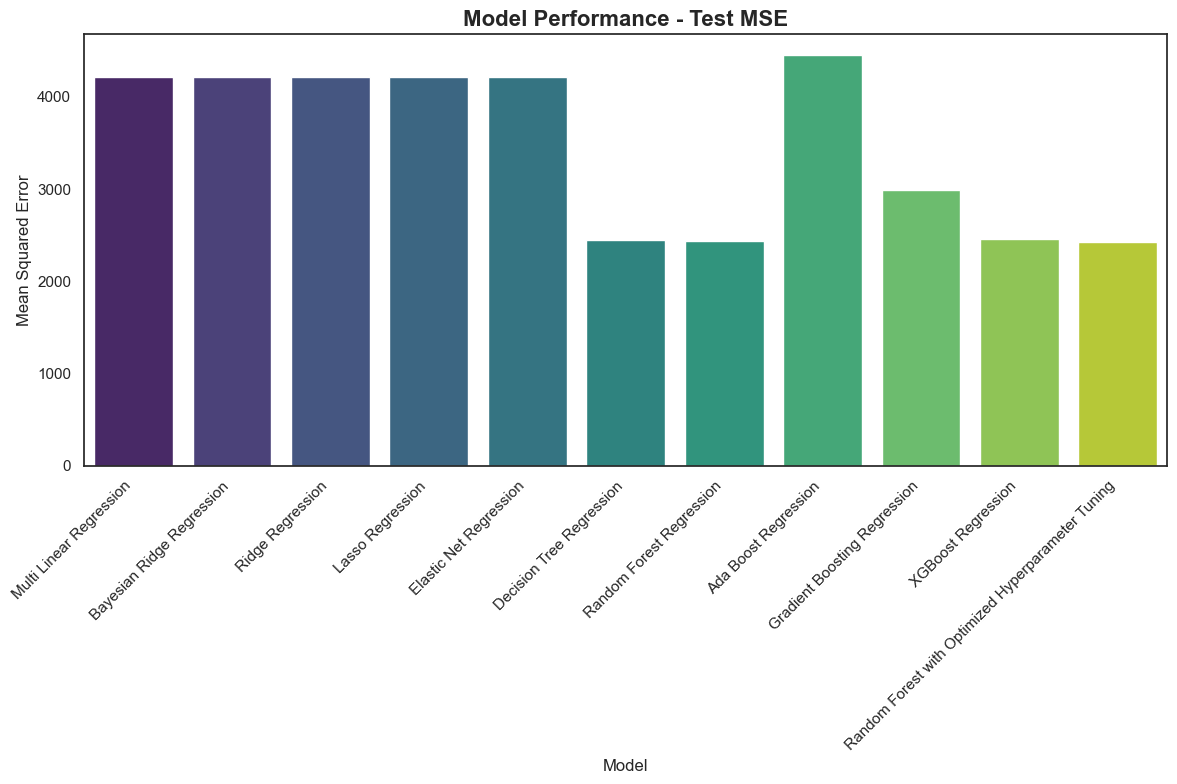

In [70]:
results_df = pd.DataFrame({
    'Model': models,
    'Train MSE': train_mses,
    'Test MSE': test_mses,
    'R-squared': scores,
    'MAE': maes
})
print(results_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Test MSE', data=results_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Model Performance - Test MSE', fontsize=16, weight='bold' )
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.savefig('9.png')
plt.show()

### 10. Models Regression Score Comparison

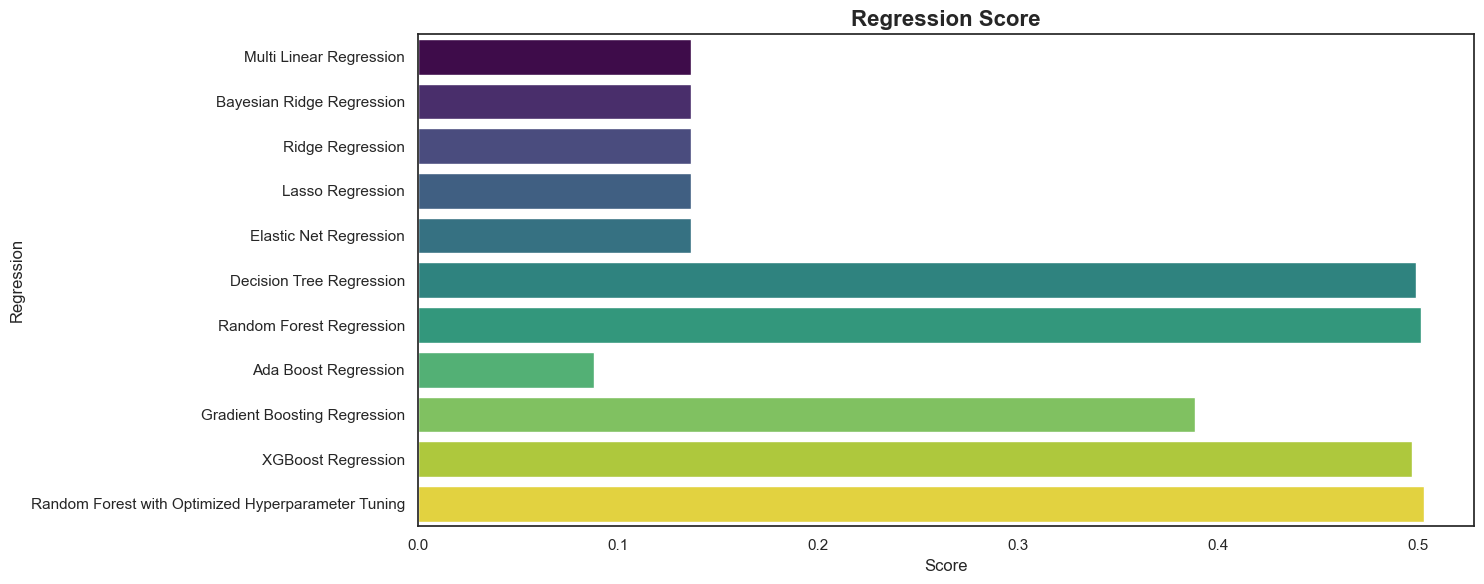

In [71]:
# Plot the regression scores
import matplotlib.cm as cm
plt.subplots(figsize=(15, 6))
colors = cm.viridis(np.linspace(0, 1, len(scores)))
sns.barplot(x=scores, y=models, palette=colors)
plt.xlabel("Score")
plt.ylabel("Regression")
plt.title('Regression Score', fontsize=16, weight='bold')
plt.savefig('10.png')
plt.tight_layout()
plt.show()

### 11. Hierarchical Clustering

In [39]:
# Select features for clustering
features = ['QUANTITY', 'ITEMS', 'TOTAL_QUANTITY', 'ADQUSAGE', 'NIC', 'ACTUAL_COST']

# Sample a subset of the data to handle memory issues
sampled_df = df.sample(n=10000, random_state=1)

In [40]:
# Normalize numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(sampled_df[features])

# Perform hierarchical clustering
linked = linkage(df_scaled, method='ward')

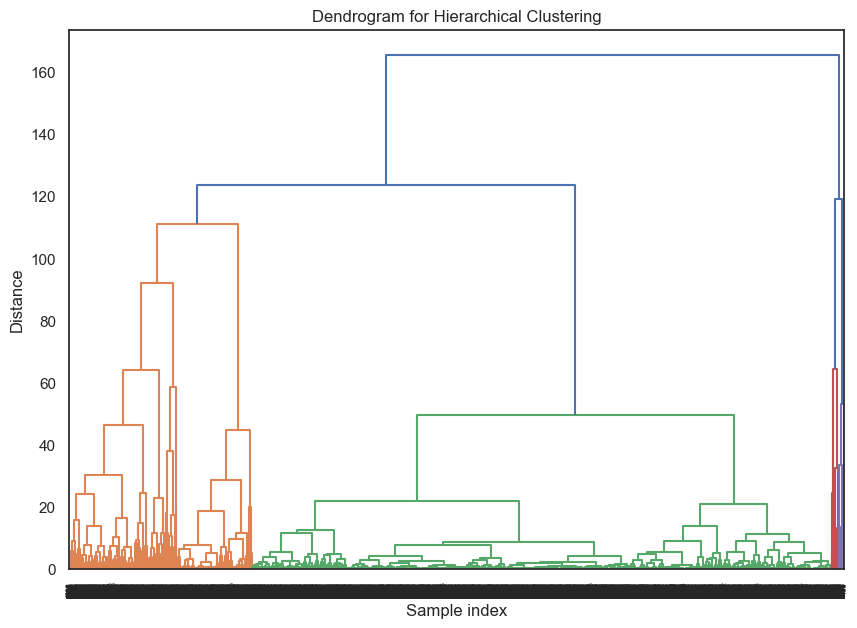

In [41]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.savefig('11.png')
plt.show()

In [42]:
# Determined the number of clusters as..
max_d = 50  # Set the maximum distance threshold based on dendrogram

# Cut the dendrogram to form clusters
clusters = fcluster(linked, max_d, criterion='distance')

# Add the cluster labels to the sampled dataframe
sampled_df['Cluster'] = clusters

### Cluster Size

In [43]:
# Display the number of samples in each cluster
cluster_sizes = sampled_df['Cluster'].value_counts()
print("Cluster sizes:\n", cluster_sizes)


Cluster sizes:
 Cluster
5     7483
10    1019
6      971
9      224
8      133
2       69
3       67
4       23
7        8
1        3
Name: count, dtype: int64


### Clustering Pairplots

C:\Users\Toshiba\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


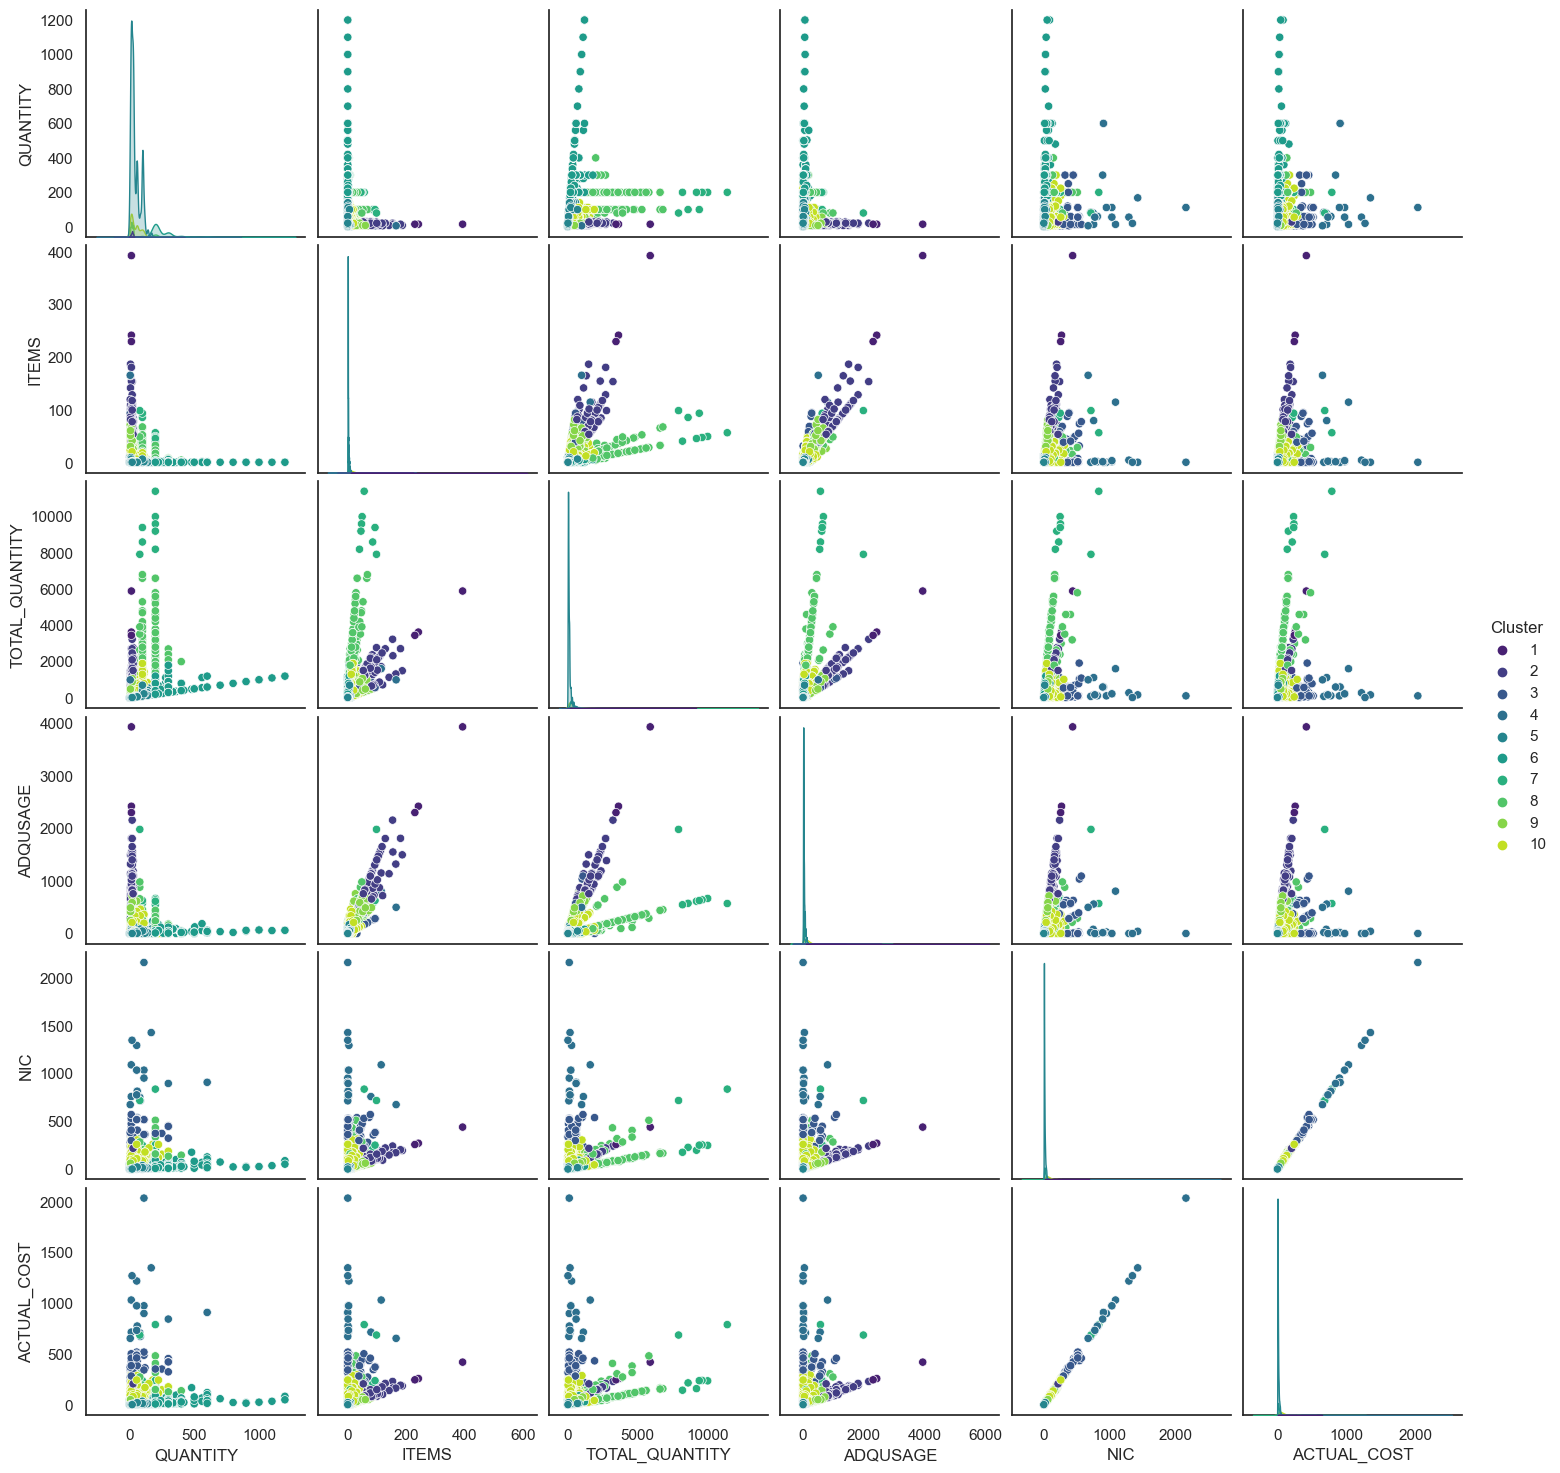

In [50]:
custom_palette = sns.color_palette("viridis", len(sampled_df['Cluster'].unique()))
sns.pairplot(sampled_df, hue='Cluster', vars=features, palette=custom_palette)
plt.savefig('12.png')
plt.show()


### Each Cluster Feature Means

In [45]:
cluster_means = sampled_df.groupby('Cluster')[features].mean()
print("Cluster feature means:\n", cluster_means)


Cluster feature means:
            QUANTITY       ITEMS  TOTAL_QUANTITY     ADQUSAGE         NIC  \
Cluster                                                                    
1         15.000000  288.333333     4325.000000  2883.333333  322.933333   
2         19.028986   89.318841     1605.536232  1049.507246  132.464203   
3         82.283582   20.328358      342.835821   155.294776  435.064627   
4        121.478261   17.608696      355.043478    90.391304  981.577391   
5         41.891888    2.258720       82.344314    22.256763    9.877135   
6        252.393409    1.725026      409.822863    24.253639   22.204943   
7        160.000000   65.125000     9290.000000   777.083329  364.127500   
8        173.203008   18.669173     2765.052632   192.071427  118.335338   
9         18.075893   39.513393      658.339286   432.550595   57.671741   
10        47.062807   11.822375      369.186457   118.369791   83.522866   

         ACTUAL_COST  
Cluster               
1         307.695

### Cluster Profiling

In [46]:
# Display cluster profiles
for cluster in cluster_sizes.index:
    print(f"Cluster {cluster} Profile:")
    print(sampled_df[sampled_df['Cluster'] == cluster][features].describe())
    print("\n")


Cluster 5 Profile:
          QUANTITY        ITEMS  TOTAL_QUANTITY     ADQUSAGE          NIC  \
count  7483.000000  7483.000000     7483.000000  7483.000000  7483.000000   
mean     41.891888     2.258720       82.344314    22.256763     9.877135   
std      36.027293     2.065912       97.242727    26.379103    10.355906   
min       1.000000     1.000000        1.000000     0.000000     0.050000   
25%      14.000000     1.000000       24.000000     5.000000     2.740000   
50%      28.000000     1.000000       56.000000    14.000000     6.120000   
75%      56.000000     3.000000      100.000000    28.000000    12.870000   
max     180.000000    19.000000      700.000000   224.000000    71.280000   

       ACTUAL_COST  
count  7483.000000  
mean      9.289120  
std       9.710839  
min       0.159510  
25%       2.624605  
50%       5.806280  
75%      12.105010  
max      67.754770  


Cluster 10 Profile:
          QUANTITY        ITEMS  TOTAL_QUANTITY     ADQUSAGE          NIC  \

###  Box Plot For Each Feature

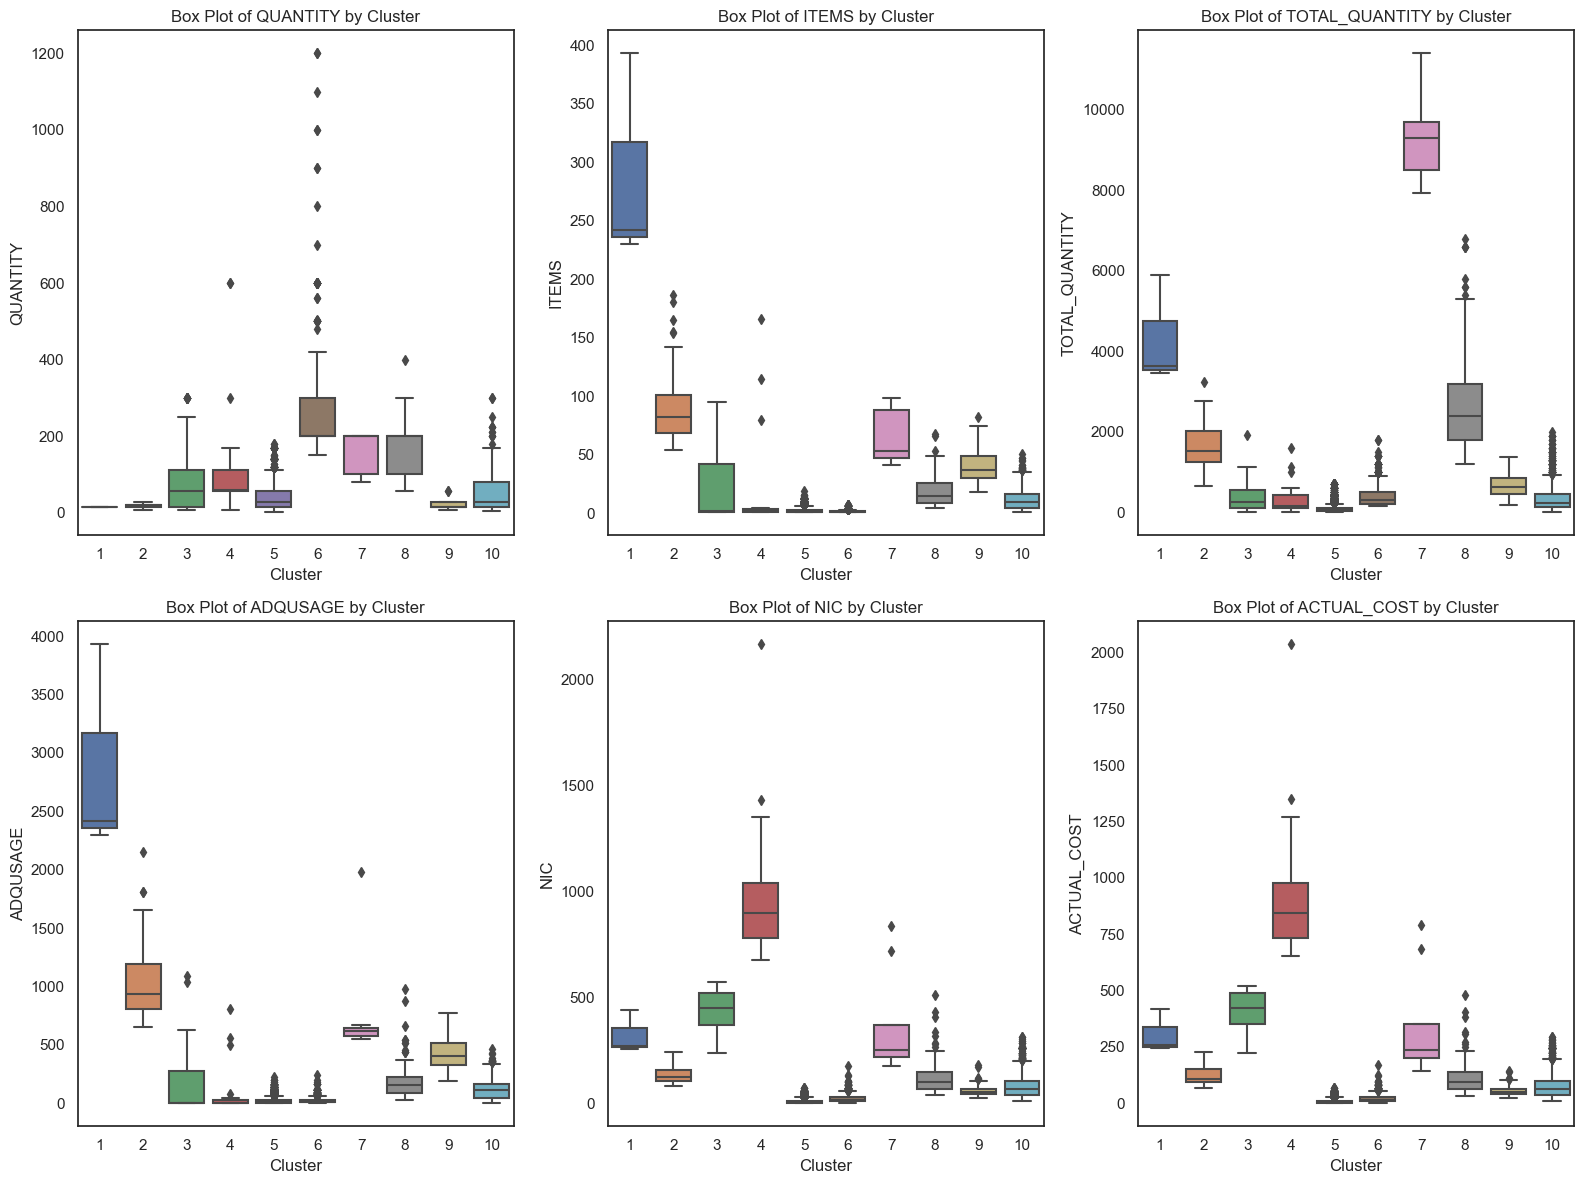

In [47]:
plt.figure(figsize=(16, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=sampled_df)
    plt.title(f'Box Plot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.savefig('13.png')
plt.show()

### Validation Metrics

In [48]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Compute internal validation metrics
silhouette_avg = silhouette_score(df_scaled, sampled_df['Cluster'])
davies_bouldin_avg = davies_bouldin_score(df_scaled, sampled_df['Cluster'])
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, sampled_df['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin_avg}")
print(f"Calinski-Harabasz Score: {calinski_harabasz_avg}")


Silhouette Score: 0.5723538908634901
Davies-Bouldin Index: 0.8471228043113761
Calinski-Harabasz Score: 3667.108143413806


### 12. K-Means Clustering

C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

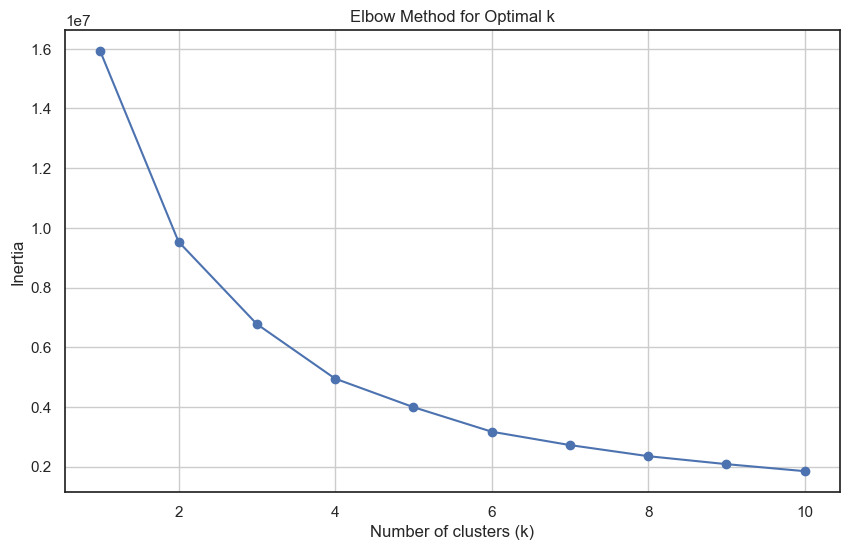

C:\Users\Toshiba\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


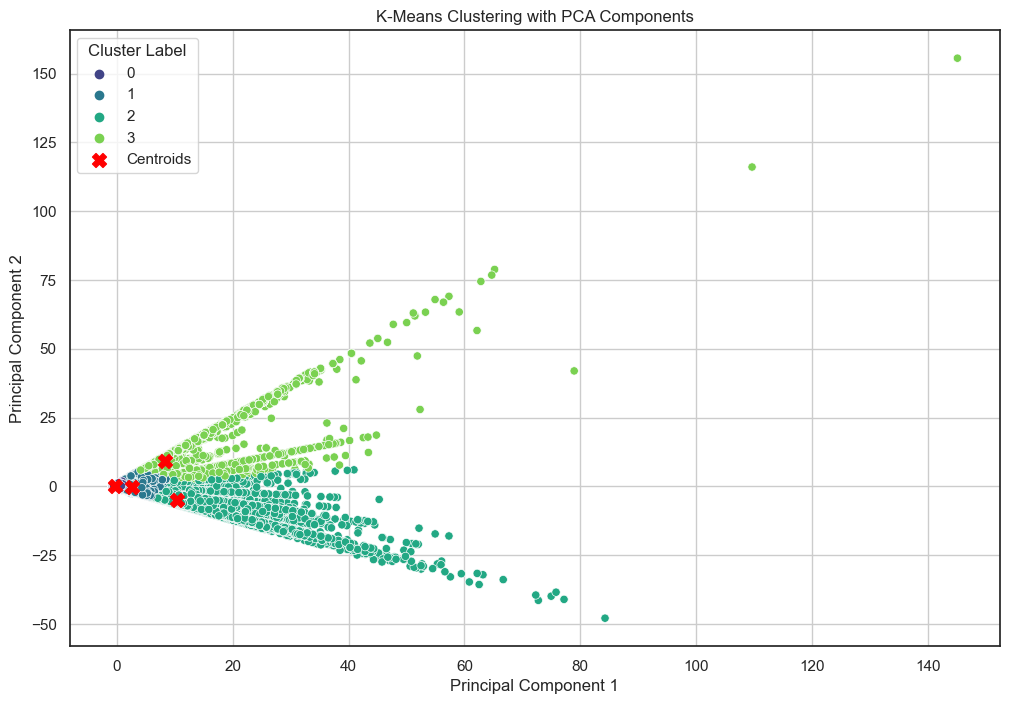

In [49]:
features_k = ['QUANTITY', 'ITEMS', 'TOTAL_QUANTITY', 'ADQUSAGE', 'NIC', 'ACTUAL_COST']
df = df.dropna(subset=features_k)
X = df[features_k]

# Standardize and apply PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig('14.png')
plt.show()

# Apply K-Means with the chosen number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Convert kmeans_labels to a Pandas Series and then to a categorical type
df['Cluster'] = pd.Series(kmeans_labels).astype('category')

# Get cluster centroids in the PCA space
centroids_pca = kmeans.cluster_centers_

# Visualize the clusters and centroids
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis', marker='o')

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=100, marker='X', label='Centroids')

plt.title('K-Means Clustering with PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.savefig('15.png')
plt.show()



# End